# HOUSE PRICE PREDICTION USING MACHINE LEARNING

# Importing required Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Reading dataset

In [5]:
df = pd.read_csv("C:/Users/PUNNA AKASH/Desktop/houseprice_dataset.csv")

# Exploratory Data Analysis

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.shape

(1460, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# visualising correlations between numerical values

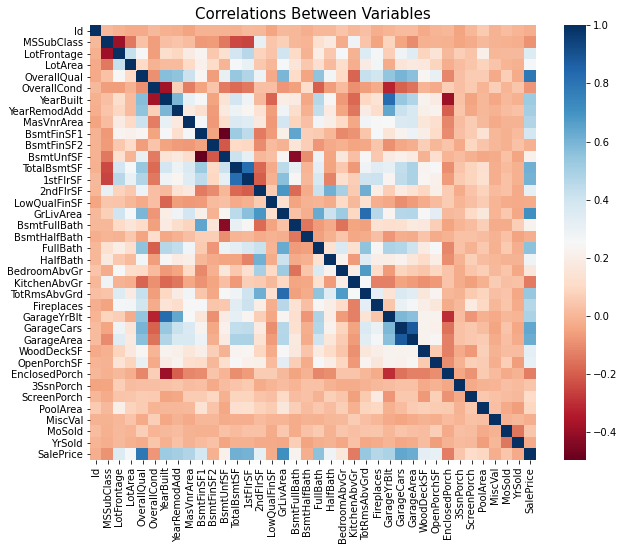

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

## FEATURE SELECTION
We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate based on Pearson Correlation Method—which is the default value of parameter "method" in corr() function. As for selecting categorical features, I selected the categorical values which I believe have significant effect on the target variable such as Heating and MSZoning.

In [10]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)

cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]

In [11]:
df[important_cols]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856,856,1710,2,8,2,548,208500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,7,2001,2002,920,920,1786,2,6,2,608,223500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,7,1915,1970,756,961,1717,1,7,3,642,140000,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


# checking for missing values

In [12]:
print("Missing Values by Column")
print(df.isna().sum())
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64
TOTAL MISSING VALUES: 0


# Data Visualisation

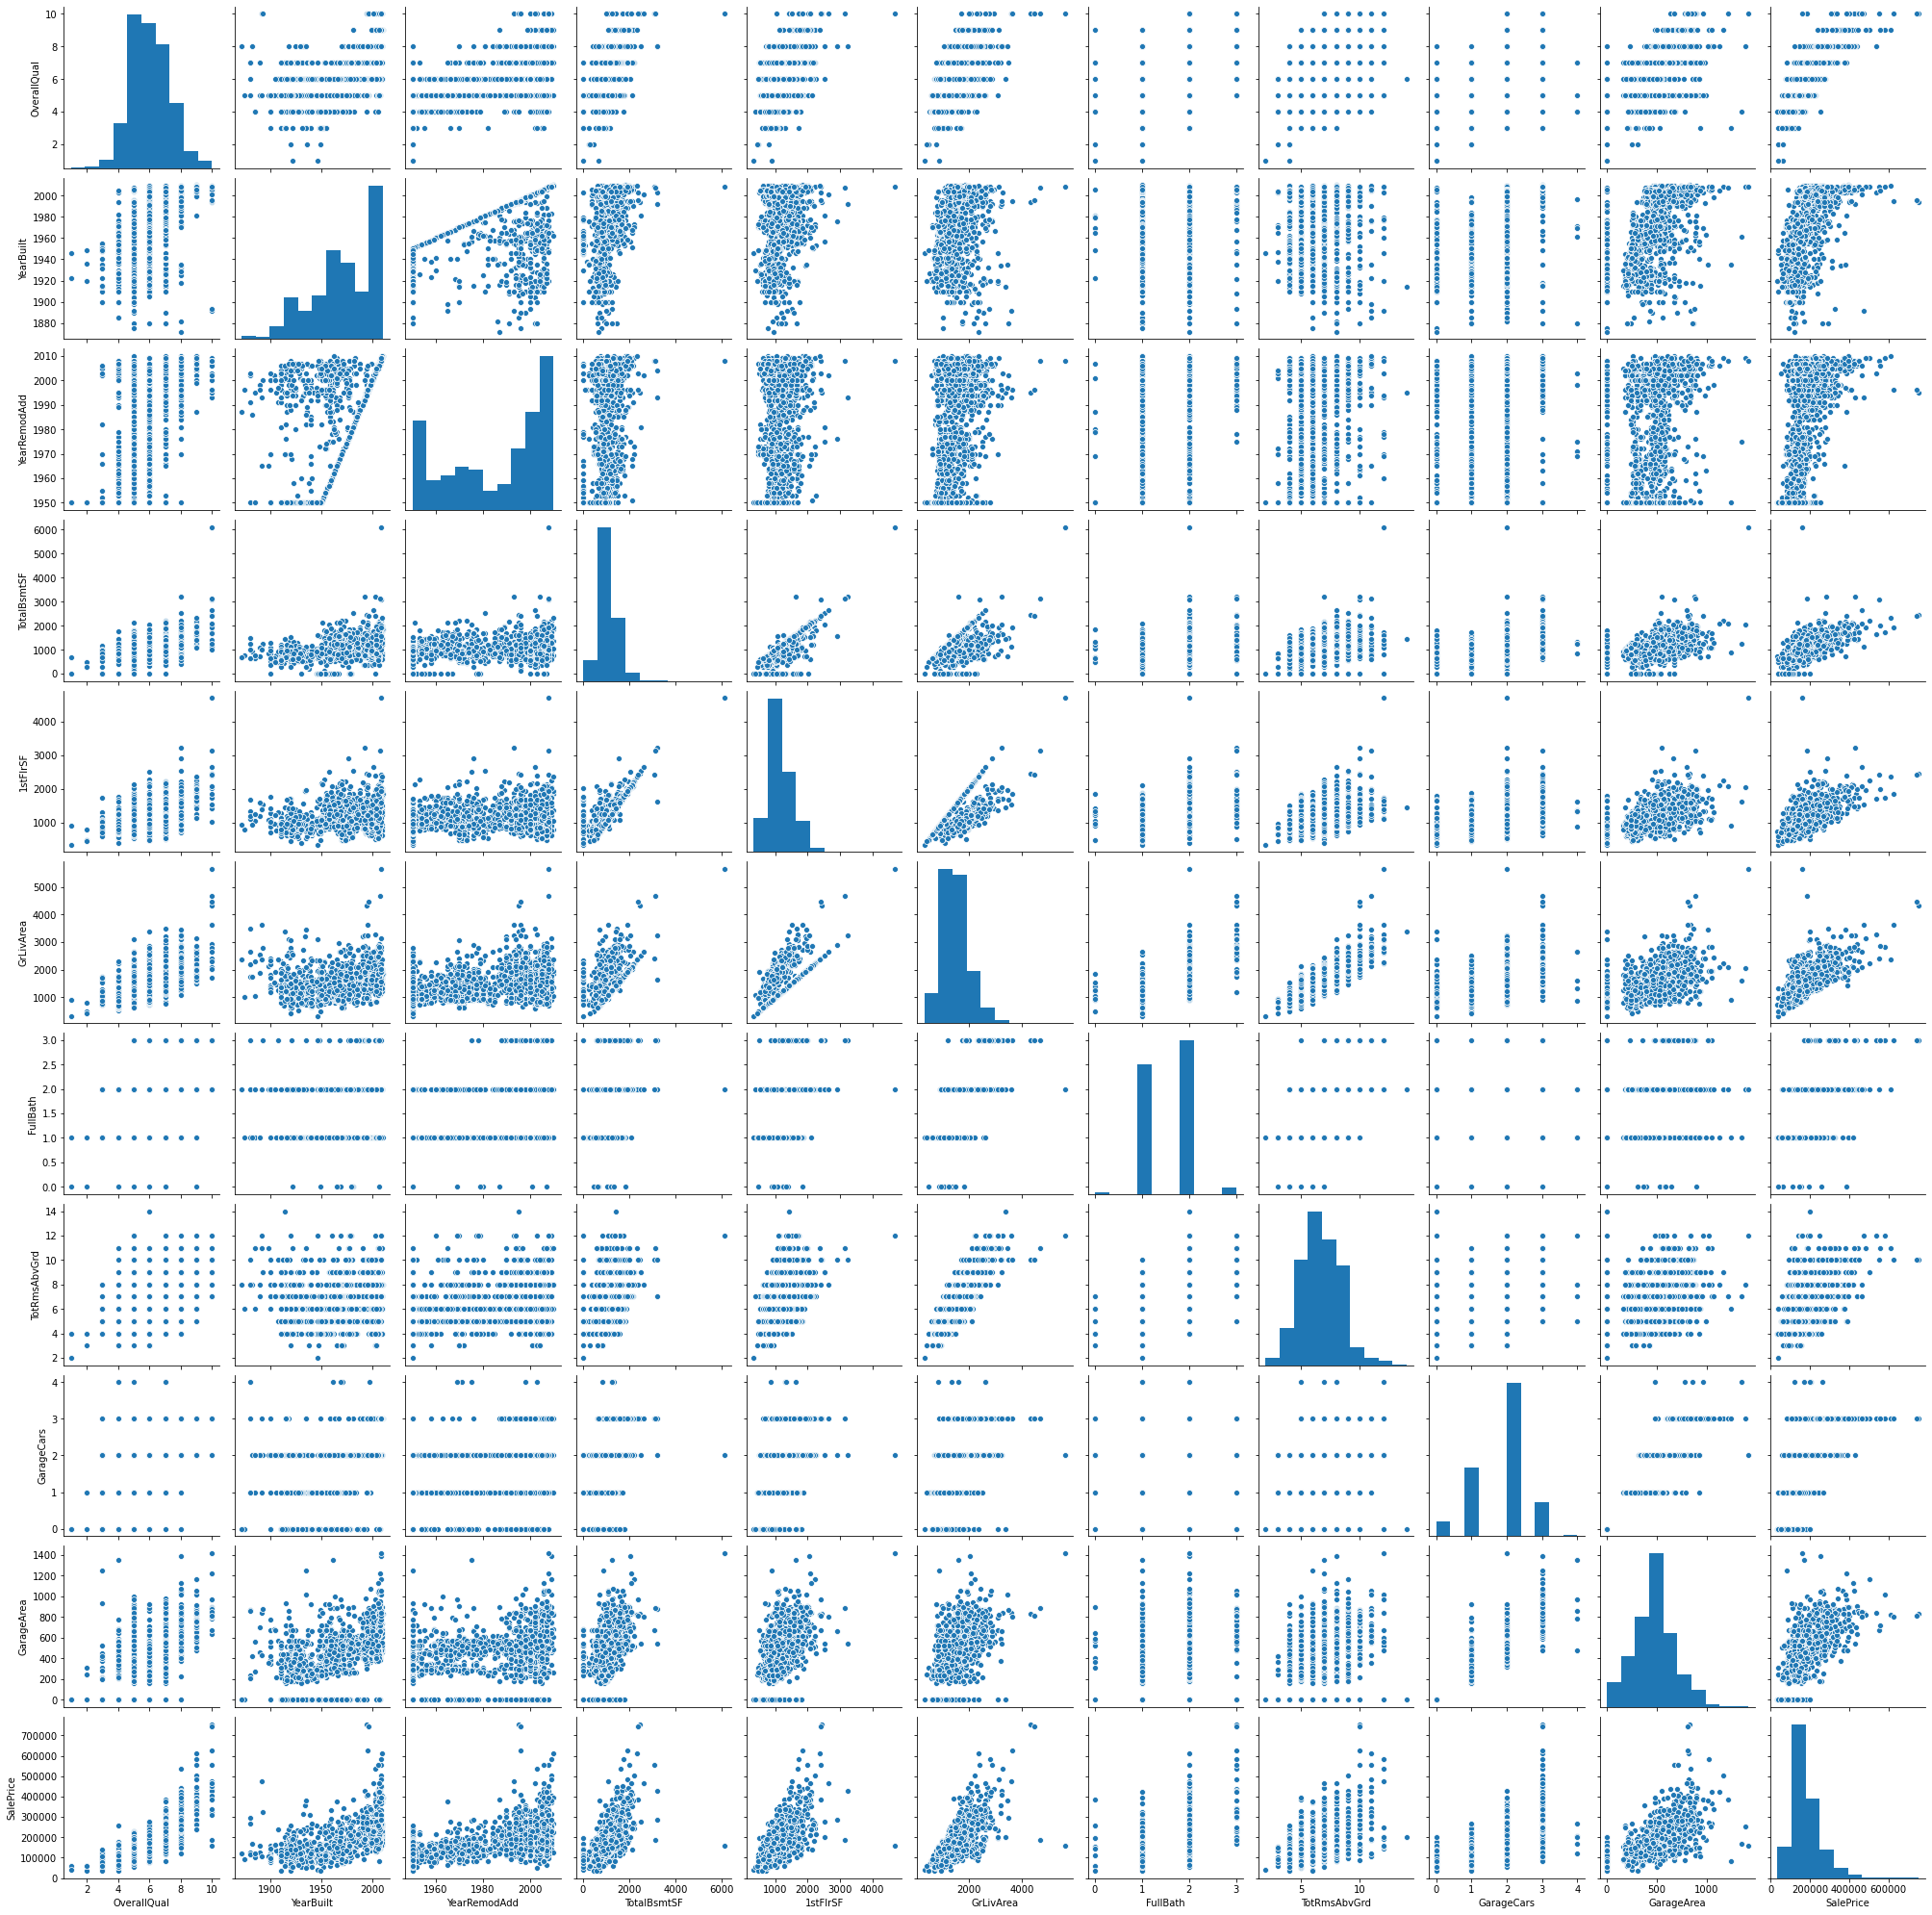

In [13]:
sns.pairplot(df[important_num_cols])

<Figure size 720x576 with 0 Axes>

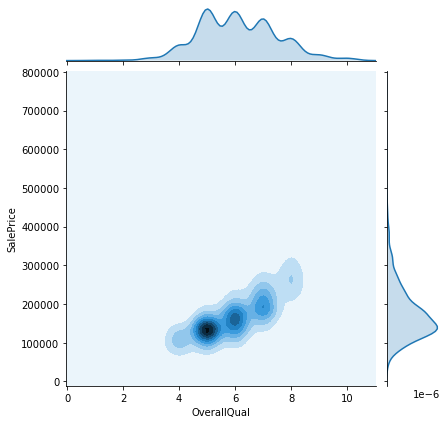

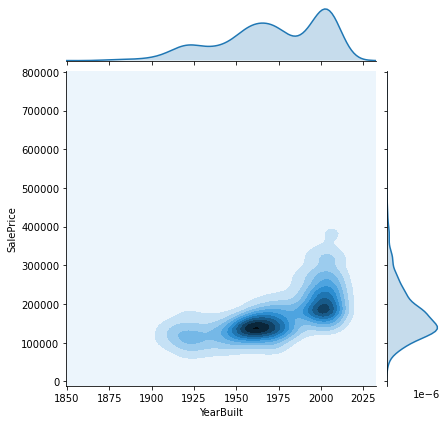

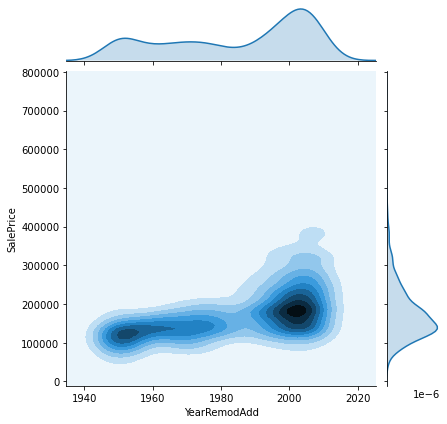

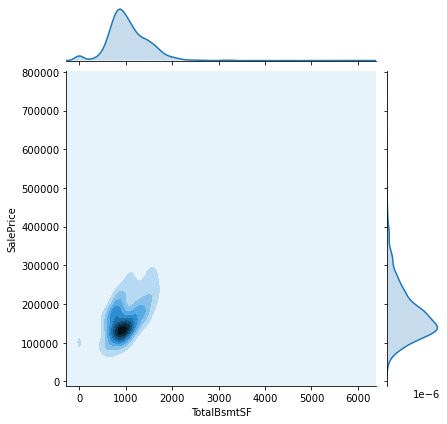

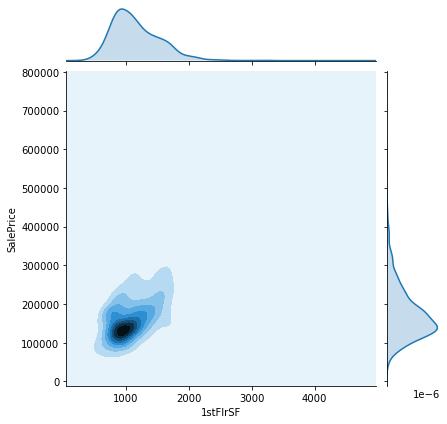

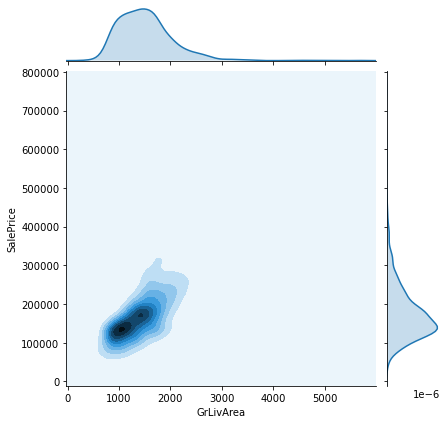

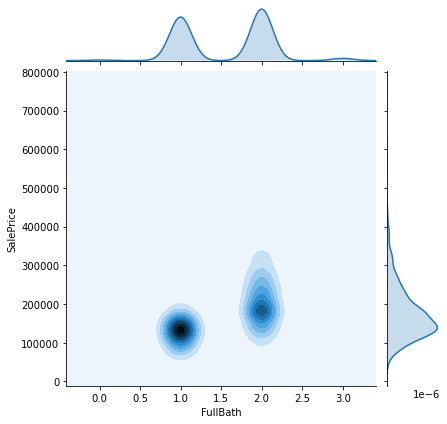

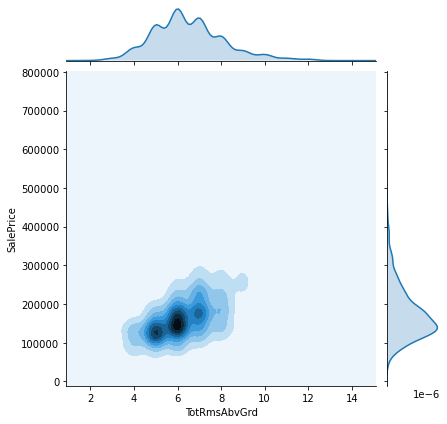

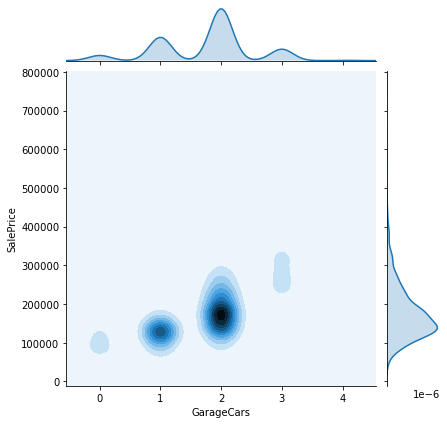

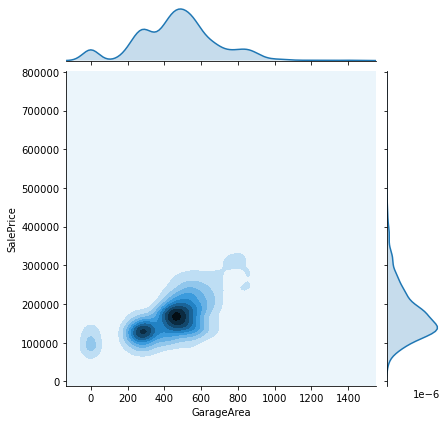

In [14]:
plt.figure(figsize=(10,8))
sns.jointplot(x=df["OverallQual"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["YearBuilt"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["YearRemodAdd"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["TotalBsmtSF"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["1stFlrSF"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GrLivArea"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["FullBath"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["TotRmsAbvGrd"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GarageCars"], y=df["SalePrice"], kind="kde")
sns.jointplot(x=df["GarageArea"], y=df["SalePrice"], kind="kde")
plt.show()

# X, Y split

In [15]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_cols:
    X[col]=le.fit_transform(X[col])

In [17]:
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856,856,1710,2,8,2,548,3,0,0,1,2,4,0
1,6,1976,1976,1262,1262,1262,2,6,2,460,3,0,0,1,3,4,0
2,7,2001,2002,920,920,1786,2,6,2,608,3,0,0,1,2,4,0
3,7,1915,1970,756,961,1717,1,7,3,642,3,0,0,1,2,0,0
4,8,2000,2000,1145,1145,2198,2,9,3,836,3,0,0,1,2,4,0


# Standardization

In [18]:
important_num_cols.remove("SalePrice")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [19]:
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,3,0,0,1,2,4,0
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,3,0,0,1,3,4,0
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,3,0,0,1,2,4,0
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,3,0,0,1,2,0,0
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,3,0,0,1,2,4,0


# Train-Test Split


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return mae, mse, rmse

# Linear Regression

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_predictions = lin_reg.predict(X_test)

mae, mse, rmse = evaluation(y_test, lin_predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 23704.850299239486
MSE: 1466712922.6234314
RMSE: 38297.688215131624


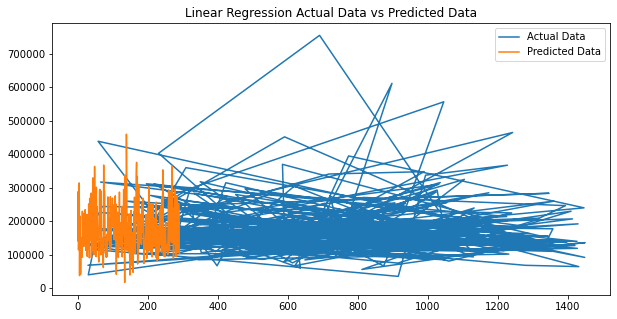

In [23]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.title("Linear Regression Actual Data vs Predicted Data")
plt.plot(y_test, label="Actual Data")
plt.plot(lin_predictions, label="Predicted Data")
plt.legend()
plt.show()

# Decision Tree Regressor

In [24]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_predictions = dt_reg.predict(X_test)

mae, mse, rmse = evaluation(y_test, dt_predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 25330.76997716895
MSE: 1813647335.7409625
RMSE: 42586.938557977635


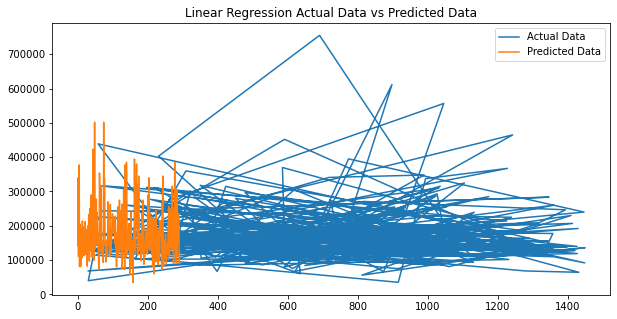

In [25]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.title("Linear Regression Actual Data vs Predicted Data")
plt.plot(y_test, label="Actual Data")
plt.plot(dt_predictions, label="Predicted Data")
plt.legend()
plt.show()

# XG Boost Regressor

In [26]:
xg_reg = XGBRegressor()
xg_reg.fit(X_train, y_train)
xg_predictions = xg_reg.predict(X_test)

mae, mse, rmse = evaluation(y_test, xg_predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 19057.624652183218
MSE: 875851422.4741267
RMSE: 29594.78708276386


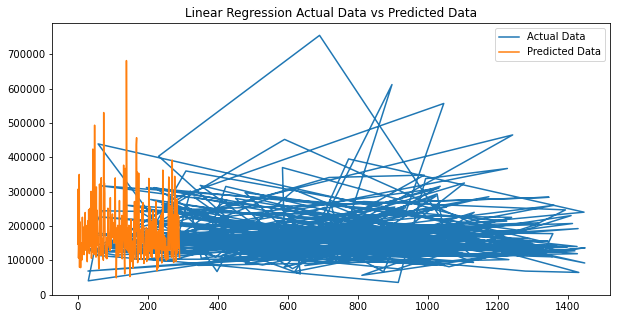

In [27]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.title("Linear Regression Actual Data vs Predicted Data")
plt.plot(y_test, label="Actual Data")
plt.plot(xg_predictions, label="Predicted Data")
plt.legend()
plt.show()

# Random Forest Regressor

In [28]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_predictions = rf_reg.predict(X_test)

mae, mse, rmse = evaluation(y_test, rf_predictions)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 18096.882334067188
MSE: 981117875.8439791
RMSE: 31322.801213237286


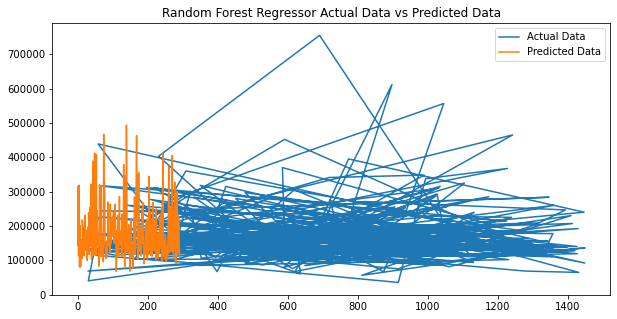

In [29]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.title("Random Forest Regressor Actual Data vs Predicted Data")
plt.plot(y_test, label="Actual Data")
plt.plot(rf_predictions, label="Predicted Data")
plt.legend()
plt.show()

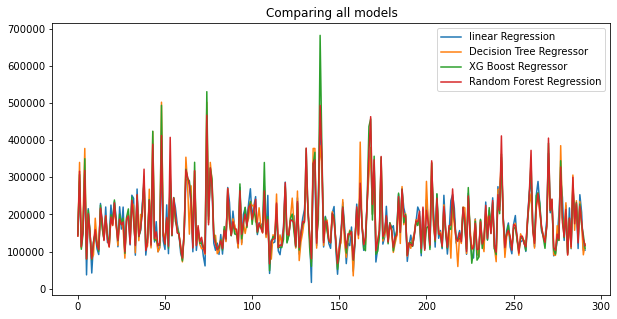

In [30]:
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.title("Comparing all models")
plt.plot(lin_predictions, label="linear Regression")
plt.plot(dt_predictions, label="Decision Tree Regressor")
plt.plot(xg_predictions, label="XG Boost Regressor")
plt.plot(rf_predictions, label="Random Forest Regression")
plt.legend()
plt.show()